# Guitar classifier

## Let's install dependencies

In [1]:
!pip install -Uqq fastai

In [2]:
!pip install -Uqq duckduckgo_search

In [3]:
from duckduckgo_search import DDGS 
from fastcore.all import *
from time import sleep

def search_images(keywords, max_images=10):
    sleep(1)
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [4]:
electric_guitar_urls = search_images('electric guitar', max_images=1)
electric_guitar_urls[0]

'https://www.yamaha.com/en/musical_instrument_guide/common/images/electric_guitar/parts_viewer01.jpg'

## Download and display guitar images

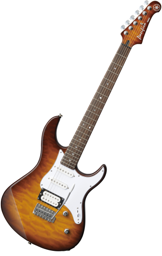

In [5]:
from fastdownload import download_url
from fastai.vision.all import *

electric_destination = 'electric_guitar.jpg'
download_url(electric_guitar_urls[0], electric_destination, show_progress=False)

image = Image.open(electric_destination)
image.to_thumb(256, 256)

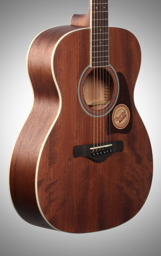

In [6]:
download_url(search_images('acoustic guitar', max_images=1)[0], 'acoustic_guitar.jpg', show_progress=False)
Image.open('acoustic_guitar.jpg').to_thumb(256, 256)

## Download images for training

In [ ]:
guitar_types = 'electric', 'bass',  'classical', 'acoustic', 'ukulele'
path = Path('guitar_classes')

for guitar_type in guitar_types:
    destination = (path/guitar_type)
    destination.mkdir(exist_ok=True, parents=True)
    image_count = 100
    download_images(destination, urls=search_images(f'{guitar_type} guitar', max_images=image_count))
    resize_images(destination, max_size=400, dest=destination)
    
    

In [8]:
broken_images = verify_images(get_image_files(path))
broken_images.map(Path.unlink)
len(broken_images)

22

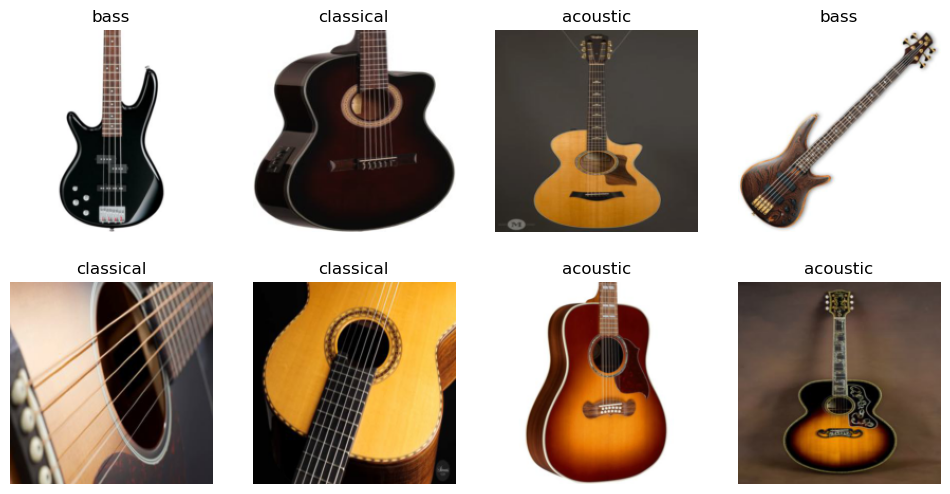

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=8)

dls.show_batch(max_n=12)

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.109056,1.707037,0.516484,00:13


epoch,train_loss,valid_loss,error_rate,time
0,1.330244,1.377589,0.428571,00:12
1,1.175177,1.484569,0.395604,00:12
2,0.773315,1.367707,0.340659,00:11


## Predict class of my guitar

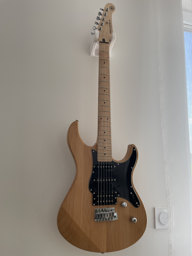

In [11]:
from fastai.vision.all import *
guitar_image = Image.open("my-guitar.jpg")
guitar_image.to_thumb(256, 256)

In [12]:
learn.predict(guitar_image)

('electric',
 tensor(3),
 tensor([5.6440e-04, 7.1673e-02, 9.4559e-04, 9.2532e-01, 1.4961e-03]))